<a href="https://colab.research.google.com/github/Hamsinikatla/NeuralNetwork_HW3/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3866 - val_loss: 0.1892
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1806 - val_loss: 0.1547
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1502 - val_loss: 0.1343
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1318 - val_loss: 0.1214
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1205 - val_loss: 0.1132
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1132 - val_loss: 0.1077
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1080 - val_loss: 0.1035
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1040 - val_loss: 0.1003
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1009 - val_loss: 0.0979
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0987 - val_loss: 0.0962
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


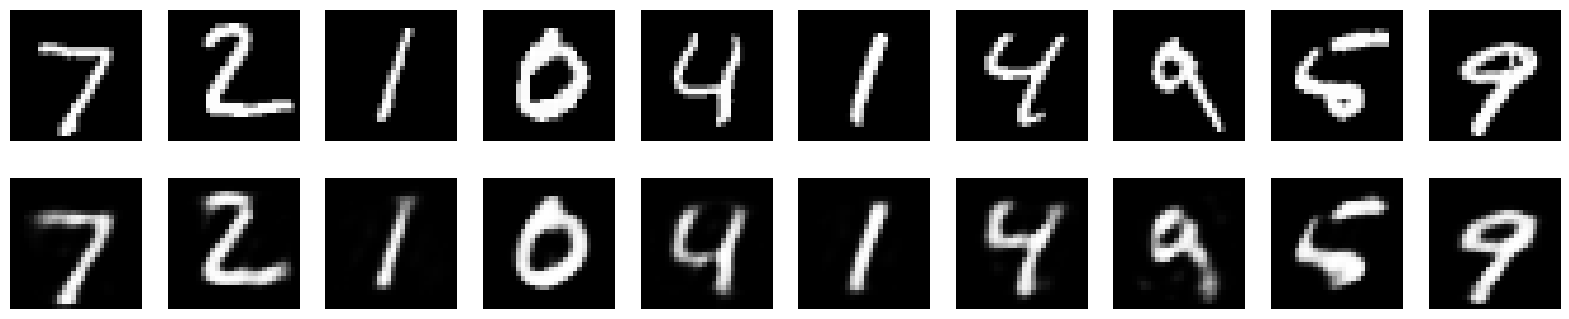

In [2]:
#Q1. Implementing a Basic Autoencoder

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Define the autoencoder model
latent_dim = 32  # Can be adjusted (e.g., 16, 64)

# Encoder
input_img = Input(shape=(784,))
encoded = Dense(latent_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some test images
encoded_imgs = autoencoder.predict(x_test)

# Plot original vs. reconstructed images
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Display reconstructed image
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

plot_images(x_test, encoded_imgs)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3758 - val_loss: 0.2230
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2135 - val_loss: 0.1816
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1782 - val_loss: 0.1655
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1638 - val_loss: 0.1539
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1527 - val_loss: 0.1450
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1441 - val_loss: 0.1385
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1381 - val_loss: 0.1345
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1347 - val_loss: 0.1319
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1323 - val_loss: 0.1302
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1309 - val_loss: 0.1288
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1287 - val_loss: 0.1269
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 

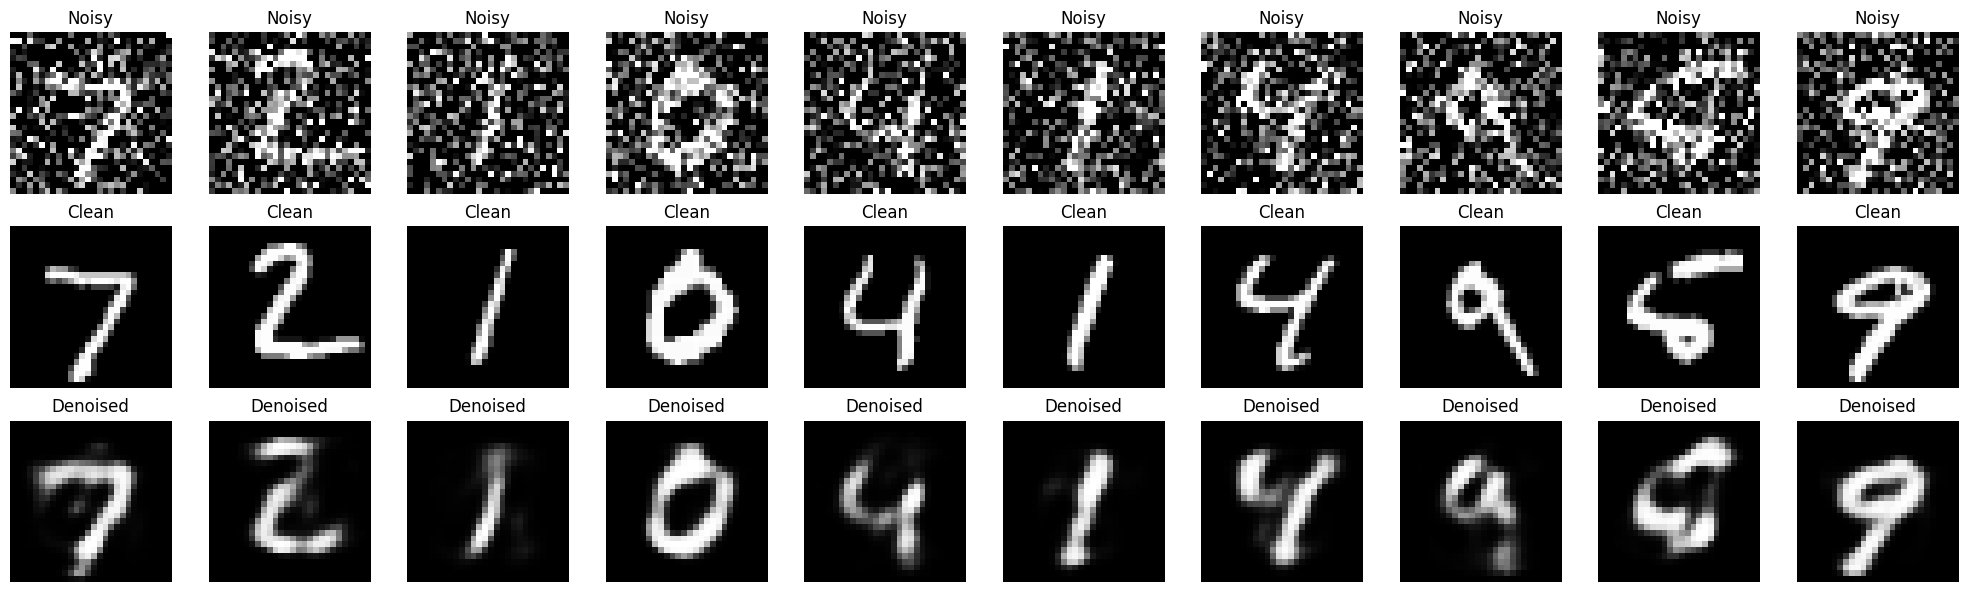

In [3]:
#Q2. Implementing a Denoising Autoencoder


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# 1. Add Gaussian noise (mean=0, std=0.5)
def add_noise(x, noise_factor=0.5):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=x.shape)
    x_noisy = x + noise
    x_noisy = np.clip(x_noisy, 0., 1.)
    return x_noisy

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# 2. Build the autoencoder
def build_denoising_autoencoder(latent_dim=32):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input_img, decoded)
    return autoencoder

# 3. Compile and train the denoising autoencoder
autoencoder = build_denoising_autoencoder()
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,  # noisy input, clean target
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# 4. Visualize: Noisy vs. Denoised output
def plot_denoising_results(noisy, clean, model, n=10):
    decoded_imgs = model.predict(noisy)
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Noisy input
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy[i].reshape(28, 28), cmap='gray')
        ax.set_title("Noisy")
        ax.axis('off')

        # Clean output (ground truth)
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(clean[i].reshape(28, 28), cmap='gray')
        ax.set_title("Clean")
        ax.axis('off')

        # Reconstructed (denoised)
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        ax.set_title("Denoised")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_denoising_results(x_test_noisy, x_test, autoencoder)


In [ ]:
#Q3.Implementing an RNN for Text Generation


import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input
from tensorflow.keras.models import Model

# 1. Load and preprocess text
text = "Shall I compare thee to a summer's day? Thou art more lovely and more temperate."

# 2. Tokenize characters
chars = sorted(set(text))
char_to_index = {c: i for i, c in enumerate(chars)}
index_to_char = {i: c for c, i in char_to_index.items()}
vocab_size = len(chars)

# 3. Create input sequences and labels
seq_length = 10
sequences = []
next_chars = []

for i in range(len(text) - seq_length):
    sequences.append([char_to_index[c] for c in text[i:i+seq_length]])
    next_chars.append(char_to_index[text[i+seq_length]])

X = np.array(sequences)
y = tf.keras.utils.to_categorical(next_chars, num_classes=vocab_size)

# 4. Define the LSTM model
input_layer = Input(shape=(seq_length,))
embedding = Embedding(input_dim=vocab_size, output_dim=8)(input_layer)
lstm_out = LSTM(128)(embedding)
output_layer = Dense(vocab_size, activation='softmax')(lstm_out)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

# 5. Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# 6. Text generation function
def generate_text(seed_text, length=100, temperature=1.0):
    result = seed_text
    for _ in range(length):
        input_seq = [char_to_index.get(c, 0) for c in result[-seq_length:]]
        input_seq = pad_sequences([input_seq], maxlen=seq_length)
        preds = model.predict(input_seq, verbose=0)[0]

        # Apply temperature
        preds = np.log(preds + 1e-10) / temperature  # avoid log(0)
        preds = np.exp(preds)
        preds = preds / np.sum(preds)

        next_index = np.random.choice(len(chars), p=preds)
        next_char = index_to_char[next_index]
        result += next_char
    return result

# 7. Generate example text
print("\nGenerated Text (Temperature = 0.5):\n")
print(generate_text("Shall I com", length=200, temperature=0.5))


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 10, 8)               │             184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 23)                  │           2,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,295 (286.31 KB)

 Trainable params: 73,295 (286.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 3.1331
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.1224
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.1087
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.0853
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.0477
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.9809 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.8528
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.7248
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.8612 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.7012
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.6845 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6962 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.7049
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.7526
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6975 
Epoch 16/50
3/3 ━━━━━━━━━━━━━

In [ ]:
#Q4. Sentiment Classification Using RNN


# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# 1. Load IMDB dataset (with top 10,000 most frequent words)
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# 2. Preprocess the data: Pad sequences to make them uniform length (maxlen = 250)
maxlen = 250
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')

# 3. Build LSTM model for sentiment classification
model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),  # Embedding layer
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer with dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# 4. Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Display the model architecture
model.summary()

# 6. Train the model (3 epochs for demonstration; can be adjusted)
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# 7. Evaluate the model on the test data
y_pred_prob = model.predict(x_test)  # Get probabilities for each class
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# 8. Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)  # Confusion matrix
report = classification_report(y_test, y_pred, digits=4)  # Classification report (accuracy, precision, recall, F1-score)

# 9. Print the confusion matrix and classification report
print("\n Confusion Matrix:\n", cm)
print("\n Classification Report:\n", report)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 281s 881ms/step - accuracy: 0.5084 - loss: 0.6933 - val_accuracy: 0.5364 - val_loss: 0.6909
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 324s 889ms/step - accuracy: 0.5630 - loss: 0.6729 - val_accuracy: 0.5422 - val_loss: 0.6820
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 275s 879ms/step - accuracy: 0.6217 - loss: 0.6205 - val_accuracy: 0.6990 - val_loss: 0.5870
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step

 Confusion Matrix:
 [[ 6725  5775]
 [ 1689 10811]]

 Classification Report:
               precision    recall  f1-score   support

           0     0.7993    0.5380    0.6431     12500
           1     0.6518    0.8649    0.7434     12500

    accuracy                         0.7014     25000
   macro avg     0.7255    0.7014    0.6932     25000
weighted avg     0.7255    0.7014    0.6932     25000

